# Thinkful Data Science Prep Course Capstone Project: 
# Occam Video Solutions Sales Data

**Teresa O'Neill**

**September, 2017**

## Overview

Occam Video Solutions is a small software company specializing in forensic video analysis. Currently in its second year of operations, Occam Video Solutions is cultivating a law enforcement customer base for its flagship product, iNPUT-ACE, an application that streamlines the analysis of video evidence by allowing investigators and technicians to manage evidence in hundreds of proprietary digital video formats. Occam Video Solutions also provides training and technical support for iNPUT-ACE. 

Occam Video Solutions' certified forensic video analysts offer training workshops and technical presentations throughout the U.S. and internationally under the auspirces of professional organizations like the Law Enforcement Video Association. Workshops and presentations support iNPUT ACE marketing campaigns by including demonstrations of the software's functionality. Ideally, every agency that purchases an iNPUT-ACE license should also purchase a seat at an iNPUT-ACE Hands-On Training workshop, and vice versa. 

The purpose of this report is to analyze the sales pipeline for iNPUT-ACE products. It includes a description of the customer base, a summary of current sales opportunities, and an analysis of purchasing behavior of different law enforcement agencies. The report addresses three primary analytic questions:

**1. What is the makeup of Occam Video Solutions' current customer base?**

**2. How do Occam products move through the sales pipeline?**

**3. How do demographic, marketing, and product-related factors affect purchasing behavior?**


The data examined in this report come from two sources:

- SalesForce reports on Occam Video Solutions' customer base, sales opportunities, and marketing campaigns (technical presentations and trainings).
- Results of a national survey by the Bureau of Justice Statistics (U.S. Department of Justice, Bureau of Justice Statistics, 2013) on the demographics and expenditures of a sample of local, county, and state law enforcement agencies. 


In [1]:
#preamble
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import time
import datetime
from datetime import date
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

In [2]:
#import the data
campaigns = pd.read_csv('campaigns.csv')
contacts = pd.read_csv('contacts.csv')
opportunities = pd.read_csv('opportunities.csv')
bjs = pd.read_csv('bjs_data.csv', na_values=['#NULL!'])

## 1. The Customer Base

The first component of this analysis concerns the makeup of the customer base. We would like the following information about Occam Video Solutions' customers:

- How many agencies are represented in the contacts list, and how many contacts does Occam Video Solutions have at each agency?
- Where are the customers located?
- What types of agencies are represented (e.g., local law enforcement, state police, federal agencies), and how is the customer base distributed across these types of agencies?
- How big is each agency, in terms of personnel and operating budget? 

To answer these questions, we will examine the contacts report from SalesForce, which includes a list of the individual contacts logged in SalesForce, along with the corresponding agency. Data from the Bureau of Justice Statistics survey provides supplementary information about the demographics and expenditures of a *subset* of the law enforcement agencies in the contacts list. 

### *Summary of contacts and agencies*

Occam Video Solutions' current customer base includes 3,583 contacts across 1,772 agencies. At all but three agencies (Houston Police Department, Metropolitan Nashville Police Department, and Seattle Police Department), Occam has fewer than 20 contacts. The histogram below shows how many contacts Occam has at each agency in its customer base.  

In [75]:
contacts_len = len(contacts)
contacts_per_agency = contacts['Agency Name'].value_counts()
#contacts['Contacts per Agency'] = contacts.groupby('Agency Name')['Agency Name'].count()

#The following worked previously, generating a new colum with the frequency of each 'Agency Name', and then when I restarted the kernel and reran the cells, it generated the error message.

contacts['Contacts per Agency'] = contacts.groupby('Agency Name').transform('count')

print(contacts['Contacts per Agency'].describe())

agencies = contacts.drop_duplicates(subset='Agency Name', keep="first")
agencies_len = len(agencies)

print('contacts: {}; \nagencies: {}'.format(contacts_len, agencies_len))


print('\nAgencies with at least 25 contacts:')
print(agencies.loc[agencies['Contacts per Agency']>20, ['Agency Name','Contacts per Agency']])

count   3,583
mean        5
std         7
min         1
25%         1
50%         3
75%         6
max        43
Name: Contacts per Agency, dtype: float64
contacts: 3583; 
agencies: 1772

Agencies with at least 25 contacts:
                                   Agency Name  Contacts per Agency
1341                 Houston Police Department                   43
1900  Metropolitan Nashville Police Department                   41
2898                 Seattle Police Department                   28


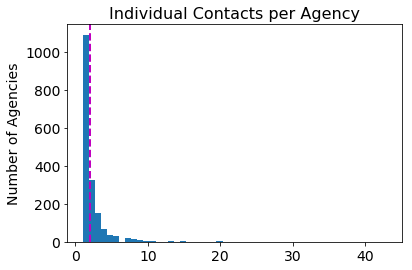

count    1772.000000
mean        2.022009
std         2.475417
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: Agency Name, dtype: float64

In [6]:
ax = contacts_per_agency.plot(kind='hist', bins=50, fontsize=14)
ax.set_title('Individual Contacts per Agency', fontsize=16)
plt.axvline(contacts_per_agency.mean(), color='m', linestyle='dashed', linewidth=2)
plt.ylabel('Number of Agencies', fontsize=14)
plt.show()

contacts_per_agency.describe()


### *Locations of customers*

The customer base includes agencies in 70 different countries. Of these agencies, 88.9% are located in the United States, 3.4% are located in Canada, and 1.4% are located in the United Kingdom. 

countries: 70
Mailing Country
New Zealand        0.282167
Australia          0.395034
United Kingdom     1.410835
Canada             3.442438
United States     88.939052
dtype: float64


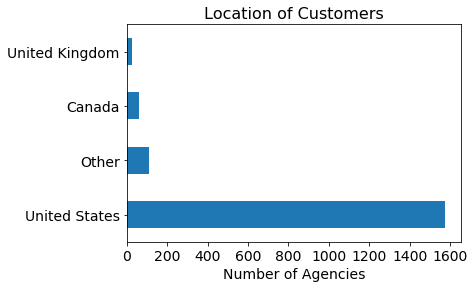

In [7]:
#Create a new variable to track the principal countries in the contacts list. 
countries_len = agencies['Mailing Country'].nunique()
print('countries: {}'.format(countries_len))
#print % in U.S., Can, etc.
country_percent = agencies.groupby('Mailing Country').size().transform(lambda x: x/sum(x) *100)
country_percent.sort_values(inplace=True, ascending=True)
print(country_percent)[-5:]

country = agencies['Mailing Country'].apply(lambda x: 'Other' if (x !='United States' and x!='Canada' and x!='United Kingdom') else x)
country.value_counts().plot(kind='barh', fontsize=14)
plt.ylabel('')
plt.title('Location of Customers', fontsize=16)
plt.ylabel('')
plt.xlabel('Number of Agencies', fontsize=14)
plt.show()

### *Types of agencies in customer base*

Now let us get a sense for the types of agencies in the customer base, and the jurisdictions they represent.

In [8]:
#Create a variable to categorize the types of agencies in the agencies list.
agencies['type'] = 'Other'
agencies.loc[(agencies['Agency Name'].str.contains('Military')), ['type']] = 'Military'
agencies.loc[(agencies['Agency Name'].str.contains('Air Force')), ['type']] = 'Military'
agencies.loc[(agencies['Agency Name'].str.contains('Armed Forces')), ['type']] = 'Military'
agencies.loc[(agencies['Agency Name'].str.contains('Marine Corps')), ['type']] = 'Military'
agencies.loc[(agencies['Agency Name'].str.contains('Army')), ['type']] = 'Military'
agencies.loc[(agencies['Agency Name'].str.contains('Navy')), ['type']] = 'Military'
agencies.loc[(agencies['Agency Name'].str.contains('Fire ')), ['type']] = 'Fire'
agencies.loc[(agencies['Agency Name'].str.contains('Police Department')), ['type']] = 'Police'
agencies.loc[(agencies['Agency Name'].str.contains('of Police')), ['type']] = 'Police'
agencies.loc[(agencies['Agency Name'].str.contains('Police Service')), ['type']] = 'Police'
agencies.loc[(agencies['Agency Name'].str.contains('University')), ['type']] = 'Police'
agencies.loc[(agencies['Agency Name'].str.contains('County Police')), ['type']] = 'Police'
agencies.loc[(agencies['Agency Name'].str.contains('Department of Public Safety')), ['type']] = 'Public Safety'
agencies.loc[(agencies['Agency Name'].str.contains('Sheriff')), ['type']] = 'Sheriff'
agencies.loc[(agencies['Agency Name'].str.contains('Constab')), ['type']] = 'Police'
agencies.loc[(agencies['Agency Name'].str.contains('District Attorney')), ['type']] = 'Prosecutor'
agencies.loc[(agencies['Agency Name'].str.contains('Prosecutor')), ['type']] = 'Prosecutor'
agencies.loc[(agencies['Agency Name'].str.contains('LLC')), ['type']] = 'Private Attorney'
agencies.loc[(agencies['Agency Name'].str.contains('State Police')), ['type']] = 'State Police'
agencies.loc[(agencies['Agency Name'].str.contains('State Trooper')), ['type']] = 'State Police'
agencies.loc[(agencies['Agency Name'].str.contains('State Patrol')), ['type']] = 'State Police'
agencies.loc[(agencies['Agency Name'].str.contains('Federal')), ['type']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('National')), ['type']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('United States')), ['type']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('US Customs and Border Protection')), ['type']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('US Department of Commerce')), ['type']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('US Marshals Service')), ['type']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('Bureau of Alcohol, Tobacco, Firearms & Explosives')), ['type']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('Department of Homeland Security')), ['type']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('Department of Justice')), ['type']] = 'Prosecutor'
agencies.loc[(agencies['Agency Name'].str.contains('Drug Enforcement Administration')), ['type']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('FBI')), ['type']] = 'Federal'

#Create a variable to categorize the jurisdictions of agencies in the agencies list.
agencies['jurisdiction'] = 'Unknown/Other'
agencies.loc[(agencies['type'].str.contains('Military')), ['jurisdiction']] = 'Military'
agencies.loc[(agencies['Agency Name'].str.contains('City of')), ['jurisdiction']] = 'Local'
agencies.loc[(agencies['Agency Name'].str.contains('Police Department')), ['jurisdiction']] = 'Local'
agencies.loc[(agencies['Agency Name'].str.contains('Police Service')), ['jurisdiction']] = 'Local'
agencies.loc[(agencies['type'].str.contains('Fire')), ['jurisdiction']] = 'Local'
agencies.loc[(agencies['Agency Name'].str.contains('Sheriff')), ['jurisdiction']] = 'County'
agencies.loc[(agencies['Agency Name'].str.contains('County')), ['jurisdiction']] = 'County'
agencies.loc[(agencies['Agency Name'].str.contains('Constabulary')), ['jurisdiction']] = 'County'
agencies.loc[(agencies['Agency Name'].str.contains('District Attorney')), ['jurisdiction']] = 'County'
agencies.loc[(agencies['type'].str.contains('State Police')), ['jurisdiction']] = 'State/provincial'
agencies.loc[(agencies['Agency Name'].str.contains('Provincial')), ['jurisdiction']] = 'State/provincial'
agencies.loc[(agencies['Agency Name'].str.contains('Federal') & agencies['Mailing Country'].str.contains('United States')), ['jurisdiction']] = 'Federal/National'
#agencies.loc[(agencies['Agency Name'].str.contains('Federal') & agencies['Mailing Country'].str.contains('Canada')), ['jurisdiction']] = 'Federal (Can)'
agencies.loc[(agencies['Agency Name'].str.contains('United States')), ['jurisdiction']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('Bureau of Alcohol, Tobacco, Firearms & Explosives')), ['jurisdiction']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('Department of Homeland Security')), ['jurisdiction']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('US Department of Justice')), ['jurisdiction']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('Drug Enforcement Administration')), ['jurisdiction']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('FBI')), ['jurisdiction']] = 'Federal'
agencies.loc[(agencies['Agency Name'].str.contains('University')), ['jurisdiction']] = 'Campus'
agencies.loc[(agencies['type'].str.contains('Federal')), ['jurisdiction']] = 'Federal'


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [9]:
type_percents = agencies.groupby('type').size().transform(lambda x: x/sum(x) *100)
type_percents.sort_values(inplace=True, ascending=True)
print(type_percents)[-3:]

type
Sheriff    13.092551
Other      21.839729
Police     53.498871
dtype: float64


The bar chart below depicts the number of each type of agency in the customer base. Police agencies account for the largest proportion (53.5%) of the customer base. The high preponderance of agencies classified as "Other" (21.8%) may be due to naming idiosyncracies and international agencies, which resist automatic classification.

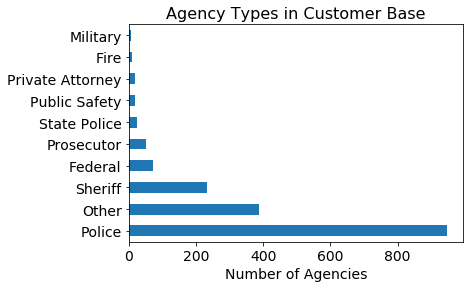

In [10]:
#Plot the frequencies of the different agency types in the customer base.
agencies['type'].value_counts().plot(kind='barh',fontsize=14)
plt.title('Agency Types in Customer Base', fontsize=16)
plt.ylabel('')
plt.xlabel('Number of Agencies', fontsize=14)
plt.show()

Now that we know the types of agencies represented in the customer base, it is also useful to note the jurisdictions they serve. In the plot below, "Unknown/Other" also includes private agencies. 

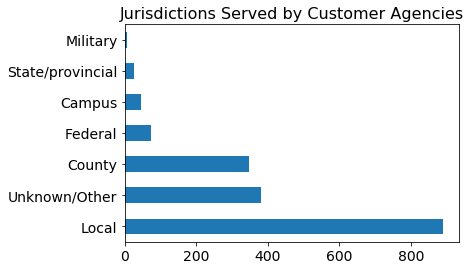

In [11]:
#Plot the frequencies of the different jurisdictions served by agencies in the customer base.

agencies['jurisdiction'].value_counts().plot(kind='barh', fontsize=14)
plt.title('Jurisdictions Served by Customer Agencies', fontsize=16)
plt.show()

In [12]:
#Inspect the size of the Bureau of Justice Statistics Survey.
#Create a dataframe with the subset of the BJS sample that are also in Occam's contact list.
print(len(bjs.columns))
print(len(bjs.index))
bjs_sub = bjs.dropna(subset=['AGENCY ID'])
print(len(bjs_sub))
print(len(agencies) - len(bjs_sub))
bjs_sub['Name'] = bjs_sub['BJS_AGENCYNAME'].str.title()

362
2826
575
1197


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### *Data from the Bureau of Justice Statistics Survey*

While Occam Video Solutions' contacts list inclues only basic contact information, a survey administered by the Bureau of Justice Statistics offers additional insight into some of the agencies in the customer base. The Bureau gathered data from 2,826 local, county, and state law enforcement agencies in the United States. The survey consisted of 362 questions about agency demographics, jurisdiction, and expenditures. 

Five hundred seventy-five (575) of the agencies sampled by the survey are also represented in the Occam Video Solutions customer base. Unfortunately, comparable data are not available for the other 1,197 agencies in the customer base, including international agencies, federal agencies, district / private attorneys, and many others. Focusing on the subset of Occam's customer base for which data are available, we can examine the size and budget of the agencies as a window into their potential purchasing power. 

First, consider the size of each agency, in terms of full-time sworn personnel. As the histogram below shows, most of the agencies in the sample are rather small: half have fewer than 161 full-time sworn officers. This is consistent with the many small municipalities and counties in the United States. The distribution of agency personnel size is skewed to the right, because of the extremely large size of the police departments in major metropolitan areas like New York City and Chicago. We get a clearer sense for the sizes of these agencies when we expand the histogram to include only the bottom 75% of the data, which is to the left of the dashed line in the first plot. 

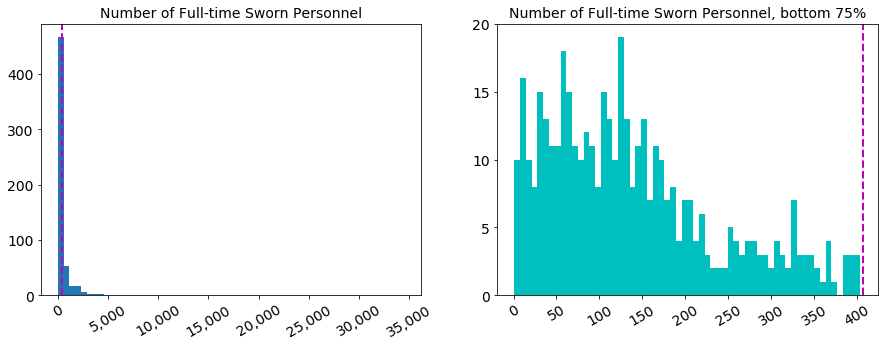

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count      575
mean       529
std      1,758
min          1
25%         79
50%        161
75%        407
max     34,454
Name: FTSWORN, dtype: float64

In [13]:
pd.options.display.float_format = '{:,.0f}'.format

bjs_sub1 = bjs_sub[bjs_sub['FTSWORN']<408]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
ax=bjs_sub['FTSWORN'].plot(kind='hist', fontsize=14, bins=60)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.axvline(bjs_sub['FTSWORN'].quantile(.75), color='m', linestyle='dashed', linewidth=2)
plt.ylabel('')
plt.title('Number of Full-time Sworn Personnel', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
ax=bjs_sub1['FTSWORN'].plot(kind='hist', fontsize=14, bins=60, color='c')
#fmt = '{x:,.0f}'
#tick = mtick.StrMethodFormatter(fmt)
#ax.xaxis.set_major_formatter(tick) 
plt.ylabel('')
plt.title('Number of Full-time Sworn Personnel, bottom 75%', fontsize=14)
plt.xlabel('')
plt.axvline(bjs_sub['FTSWORN'].quantile(.75), color='m', linestyle='dashed', linewidth=2)
plt.yticks([0,5,10,15,20,])
plt.xticks(rotation=30)

plt.show()

bjs_sub.sort_values('FTSWORN', inplace=True, ascending=False)
bjs_sub['FTSWORN'].describe()

In [14]:
print('Agencies with more than 5,000 full-time officers:')
bjs_sub.loc[bjs_sub['FTSWORN']>5000, ['Name','FTSWORN']]

Agencies with more than 5,000 full-time officers:


,Name,FTSWORN
1767,New York City Police Department,34454
458,Chicago Police Department,12042
1464,Los Angeles Police Department,9920
1463,Los Angeles County Sheriff'S Department,9266
350,California Highway Patrol,7234
1971,Philadelphia Police Department,6515
1177,Houston Police Department,5295


The annual budgets of these agencies show a similar distribution, with a median size of just `$`24.8 million, and a quarter of all agency budgets below `$`12 million. Major metropolitan areas and large state agencies skew the budget data, just as they do the personnel data. Below is a summary of the annual budgets of the agencies in the sample, and a list of the six agencies with annual budgets over one billion dollars. 

In [15]:
#pd.options.display.float_format = '${:,.0f}'.format
bjs_sub.sort_values('BDGT_TTL', inplace=True, ascending=False)
print(bjs_sub['BDGT_TTL'].describe())

print('\n Agencies with annual budget at least $1 billion:')
bjs_sub.loc[bjs_sub['BDGT_TTL']>1000000000, ['Name','BDGT_TTL']]

count             545
mean       92,437,169
std       279,923,909
min           108,000
25%        11,645,952
50%        24,800,000
75%        70,174,000
max     4,612,690,000
Name: BDGT_TTL, dtype: float64

 Agencies with annual budget at least $1 billion:


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,BDGT_TTL
1767,New York City Police Department,"4,612,690,000"
1463,Los Angeles County Sheriff'S Department,"2,806,127,000"
350,California Highway Patrol,"1,902,730,000"
1464,Los Angeles Police Department,"1,256,645,232"
458,Chicago Police Department,"1,250,254,874"
2502,Texas Department Of Public Safety,"1,146,200,000"


To get a better sense for the distribution of budget sizes, let us remove these large budgets from the dataset, and visualize the remaining budgets with a histogram.

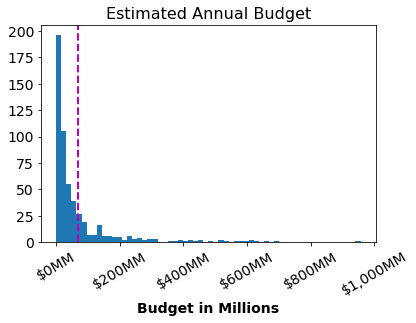

In [16]:
bjs_sub_nooutliers = bjs_sub[bjs_sub['BDGT_TTL']<=1000000000.00]
pd.options.display.float_format = '${:,.0f}'.format
budget_mils = bjs_sub_nooutliers['BDGT_TTL'].apply(lambda x: x / 1000000)

ax = budget_mils.plot(kind='hist', bins=60, fontsize=14)
fmt = '${x:,.0f}MM'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.set_title('Estimated Annual Budget', fontsize=16)
plt.axvline(budget_mils.mean(), color='m', linestyle='dashed', linewidth=2)
plt.ylabel('')
plt.xlabel('Budget in Millions', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)
plt.show()

## **2. Products in the Sales Pipeline**

The second question in this report concerns the progress of Occam Video Solutions products through the sales pipeline. Occam tracks sales of iNPUT-ACE software licenses, support, renewals, and training across four stages: "Prospecting", "Quote", "Committeed", and "Closed". We would like to know the answers to the following questions:

- What proportion of sales opportunities is at each stage of the process?
- How are sales opportunities and revenue distributed across product types? 
- How quickly do sales of different products progress through the pipeline, from prospecting to final sale?
- Has Occam Video Solutions been successful so far in ensuring that cusomters purchase training together with the software license, and vice versa?

### *Overview of current sales opportunities*

There are 1295 sales opportunities documented in the iNPUT ACE SalesForce records. The current picture is an optimistic one, as 46.6% of sales opportunities have been closed since the company's incorporation approximately two years ago, while only 11% were lost. Opportunities at the quote stage account for 37.7% of the sales pipeline. 

1295


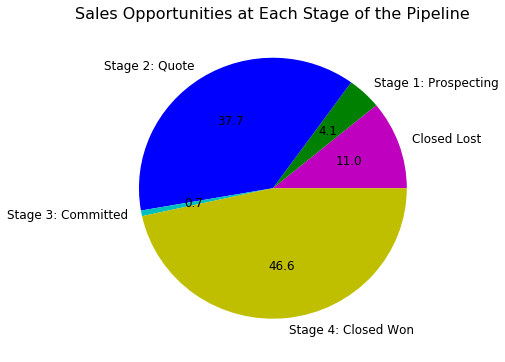

In [17]:
#working on changing the order and maybe doing a stacked bar instead

print(len(opportunities))

order = ['Closed Lost', 'Stage 1: Prospecting', 'Stage 2: Quote', 'Stage 3: Committed', 'Stage 4: Closed Won']
stages = opportunities['Stage'].value_counts()
opportunities['Stage'].value_counts().loc[order].plot(kind='pie', autopct='%.1f', figsize=(6, 6), colors=['m', 'g', 'b', 'c','y'], fontsize=12)
pylab.ylabel('')
plt.title('Sales Opportunities at Each Stage of the Pipeline', fontsize=16)

In [18]:
opportunities['reseller'] = 'Direct Sale'
opportunities.loc[(opportunities['Opportunity Name'].str.contains('Ocean')), ['reseller']] = 'Reseller'

#ocean=opportunities.groupby('reseller').sum()['Total Price'].sort_values(ascending=False) 
ocean_percent = opportunities.groupby('reseller').sum()['Total Price'].transform(lambda x: x/sum(x) *100)
ocean_percent.sort_values(inplace=True, ascending=True)
print(ocean_percent)


reseller
Reseller      $24
Direct Sale   $76
Name: Total Price, dtype: float64


The smaller number of opportunities at the prospecting stage implies that sales may slow as the company ages; however, this inference may not be warranted if we look at the nature of the products in the sales pipeline. Occam Video Solutions depends not only on the one-time sale of new iNPUT ACE software license, but also on the sale of companion software, training, support, and renewals of support packages. Let us examine how sales opportunities and revenue are distributed among the different products.

First, we must acknowledge a gap in the data: 76% of sales (by revenue) are handled by Occam, while 24% are handled by a reseller. Complete information is available from Occam Video Solutions' SalesForce reports only for direct sales by Occam. 

Proceeding with an analysis of direct sales only, we find that software licenses, including companion licenses, account for the largest share of the sales opportunities, followed by training, while new support sales and renewals account for much smaller shares.

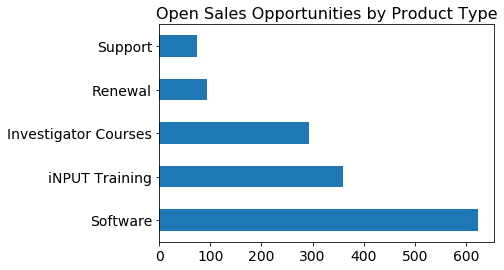

In [19]:
open_opp = opportunities[opportunities['Stage']!='Closed Lost'] 
quant_by_type=open_opp.groupby('Product Family').sum()['Quantity'].sort_values(ascending=False) 
ax = quant_by_type.plot.barh(fontsize=14)
ax.set_title('Open Sales Opportunities by Product Type', fontsize=16)
plt.ylabel('Total Price')
plt.ylabel('')
plt.xlabel('')
plt.show()

Software license sales are also responsible for the bulk of Occam Video Solutions' potential revenue, as illustrated by the figure below. Given how new the product is, and how much of the law enforcement market in the United States remains untapped, as evidenced by the sample of agencies in the Bureau of Justice Statistics Survey, Occam Video Solutions may continue to depend on new sales for some time, until its customer base is large enough that it can subsist on support, renewals, and training. 

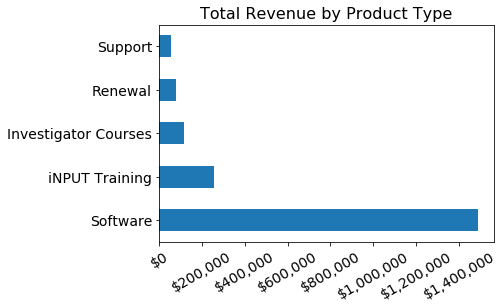

In [20]:
quant_by_type=open_opp.groupby('Product Family').sum()['Total Price'].sort_values(ascending=False) 
ax = quant_by_type.plot.barh(fontsize=14)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.set_title('Total Revenue by Product Type', fontsize=16)
plt.xticks(rotation=30)
plt.ylabel('Total Price')
plt.ylabel('')
plt.xlabel('')
plt.show()

This perspective is perhaps corroborated by the fact that over half of new software sales opportunities have yet to close. 

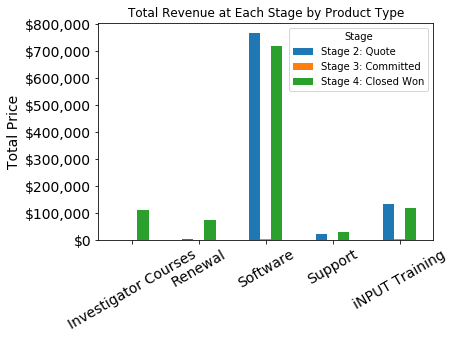

In [21]:
#'${:,.2f}'.format(open_opp['Price'])
groupbyproductstage = open_opp.groupby(['Product Family', 'Stage'])
#print groupbyproductstage['Total Price'].aggregate(np.sum)
groupbyproductstagesum = groupbyproductstage['Total Price'].aggregate(np.sum).unstack()
#print groupbyproductstagesum

ax = groupbyproductstagesum.plot(kind = 'bar', title = 'Total Revenue at Each Stage by Product Type', fontsize=14)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=30)
plt.ylabel('Total Price', fontsize=14)
plt.xlabel('')
plt.show()

### *Sales from January 2016 - August 2017*

In [29]:
#Code date variables and create a new variable to remove future closing dates.

#strategy 1:
#for date in range(len(open_opp['Close Date'])):
#    if open_opp['Close Date'][date] == '12/31/2017':
#        open_opp['Close Date'][date] = 'NaN'

#strategy 2:
#open_opp.loc[(open_opp['Close Date'].str.contains('12/31/2017')), ['Close Date']] = 'NaN'

#strategy 3:
#open_opp['Past Close'] = open_opp['Close Date'].apply(lambda x: np.nan if x > '09/08/2017' else x)

today = datetime.date.today()
today = pd.to_datetime(today)

open_opp['Created Date'] = pd.to_datetime(open_opp['Created Date'])
open_opp['Close Date'] = pd.to_datetime(open_opp['Close Date'])
open_opp['Past Close'] = open_opp['Close Date'].apply(lambda x: np.nan if x > today else x)
open_opp['Past Close'] = pd.to_datetime(open_opp['Past Close'])



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

There is a generally positive trend in the progress of these software sales opportunities since 2016, as illustrated by the figure below. (Note that sales for August and September of 2017 may actually be higher than reported.) Quotes and sales in 2017 tended to be highest in February, May, and August, suggesting that purchasing choices may be influenced by the customers' fiscal quarters. 

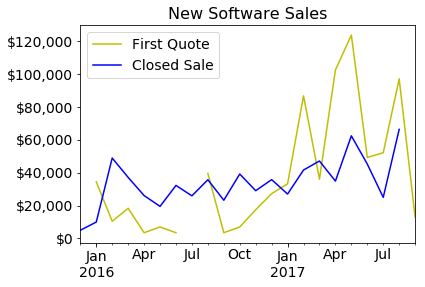

In [25]:
pd.options.display.float_format = '{:,.0f}'.format


software = open_opp[open_opp['Product Family']=='Software']
software = software[['Stage', 'Created Date', 'Close Date', 'Past Close', 'Total Price']]

purchase_patterns2 = software[['Total Price','Created Date', 'Stage']]
purchase_patterns2 = software[software['Stage']=='Stage 2: Quote']
purchase_patterns2 = purchase_patterns2.set_index('Created Date')
#quotes = purchase_patterns2.resample('M').apply(sum) 

purchase_patterns4 = software[['Total Price', 'Past Close', 'Stage']]
purchase_patterns4 = software[software['Stage']=='Stage 4: Closed Won']
purchase_patterns4 = purchase_patterns4.set_index('Past Close')
#finals = purchase_patterns4.resample('M').apply(sum) 

ax = purchase_patterns2.resample('M').apply(sum).plot(color='y', fontsize=14)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
purchase_patterns4.resample('M').apply(sum).plot(ax=ax, color='b')
ax.legend(labels=['First Quote','Closed Sale'], fontsize=14)
ax.set_title('New Software Sales', fontsize=16)
plt.xlabel('')
plt.show()


### *Progress of sales through the pipeline*

The figure above shows how much potential revenue is accounted for by software license quotes, but in order to predict how much actual revenue there will be, it would be useful to know how long customers typically take to make a purchase decision. To evaluate this, let us consider the time from first quote to final sale by product type. 

In [30]:
#Create a new timedelta variable to track how many days elapse between the opportunity's creation and closing.
#Map any null or negative values to NaN.

open_opp['Difference'] = open_opp['Past Close'] - open_opp['Created Date']
open_opp['Difference'] = open_opp['Difference'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)
open_opp['Difference'] = open_opp['Difference'].apply(lambda x: np.nan if x<0 else x)
closed_customers = open_opp[open_opp['Stage'] == 'Stage 4: Closed Won']
closed_customers = closed_customers[closed_customers['Past Close'] != 'NaN']
closed_customers.groupby('Product Family')['Difference'].describe()


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,count,mean,std,min,25%,50%,75%,max
Product Family,,,,,,,,
Investigator Courses,63,19,21,0,4,13,25,99
Renewal,60,47,48,0,8,28,71,211
Software,235,118,136,0,20,63,170,555
Support,38,120,131,0,24,71,170,516
iNPUT Training,112,92,124,0,6,39,133,555


Customers take on average 118 days to purchase software after receiving an initial quote. Sales of support packages are generally coupled with software sales, so it is not surprising that the average time to purchase of support, 120 days, is similar. Renewals of support packages and companion licenses tend to move more quickly through the pipeline, with an average time to purchase of just 47 days. 

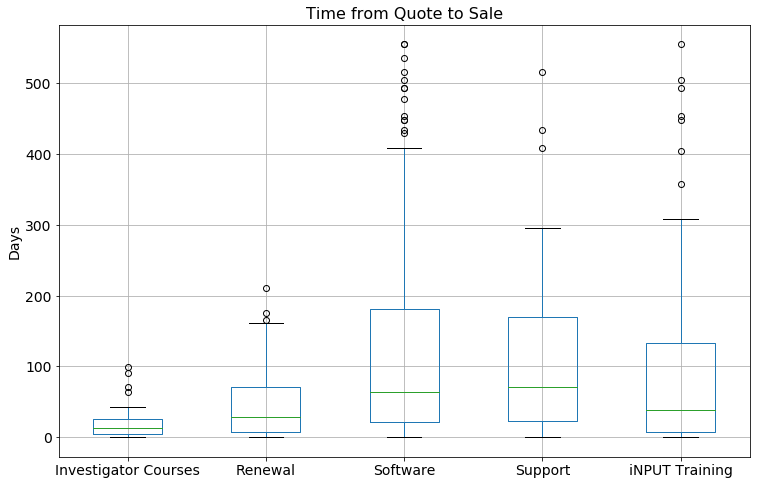

In [41]:
#open_opp = opportunities[opportunities['Stage']!='Closed Lost']
open_opp.boxplot('Difference', by='Product Family', figsize=(12, 8), fontsize=14)
plt.title('Time from Quote to Sale', fontsize=16)
plt.ylabel('Days', fontsize=14)
plt.xlabel('')
plt.suptitle('')

#open_opp['Difference'].plot(kind='box', by='Product Family', title='N', fontsize=14)

#plt.show()

In [52]:
from scipy import stats

k = len(pd.unique(open_opp['Product Family']))  # number of conditions
N = len(open_opp.values)  # conditions times participants
n = open_opp.groupby('Product Family').size()[0] #Participants in each condition

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

SSbetween = (sum(open_opp.groupby('Product Family').sum()['Difference']**2)/n) - (open_opp['Difference'].sum()**2)/N
    
#sum_y_squared = sum([x**2 for x in open_opp['Difference'].values])

open_opp['ysquared'] = open_opp['Difference']**2

sum_y_squared = open_opp['ysquared'].sum()

SSwithin = sum_y_squared - sum(open_opp.groupby('Product Family').sum()['Difference']**2)/n

SStotal = sum_y_squared - (open_opp['Difference'].sum()**2)/N

MSbetween = SSbetween/DFbetween

MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin

p = stats.f.sf(F, DFbetween, DFwithin)

eta_sqrd = SSbetween/SStotal

om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

#print(sum_y_squared)
print('DF between groups={}'.format(DFbetween))
print('DF within groups={}'.format(DFwithin))
print('F={}'.format(F))
print('p={}'.format(p))
print('eta squared={}'.format(eta_sqrd))
print('omega squared={}'.format(om_sqrd))

#mod = ols('Difference ~ Product Family', open_opp=open_opp).fit()             
#aov_table = sm.stats.anova_lm(mod, typ=2)
#print aov_table

6
DF between groups=5
DF within groups=1147
F=337.849073145
p=1.54819821662e-222
eta squared=0.595592111366
omega squared=0.593619919543


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


There is a statistically significant difference between the time from quote to product sale for the different product types as determined by one-way ANOVA (F(4,1147) = 337.85, p < 0.001, eta-squared=0.6). 

### *Sales of hands-on training*

In [ ]:
#Initialize new columns tracking the ones that need training vs. the ones that need license...



#Describe and plot training needs.

## **3. Factors Associated With Purchasing Behavior**


### *Attendance at training campaigns*

Occam Video Solutions analysts offer several different types of training courses, including dedicated hands-on iNPUT ACE workshops and webinars, which have been attended by 1,971 individuals. iNPUT ACE software is featured in all of the training campaigns. While the Investigators Two Day training serves to market iNPUT ACE software, the iNPUT ACE Two Day training is designed for customers who have purchased a license. 

Total attendees: 1971


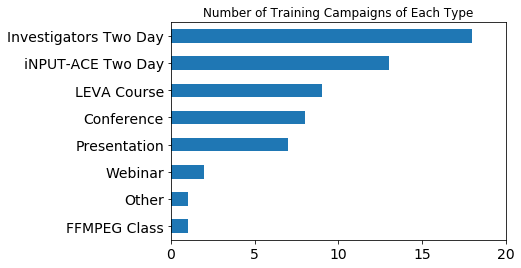

In [54]:
#How many campaigns by type
tot_attendees = len(campaigns)
print('Total attendees: {}'.format(tot_attendees))

groupbycampaigncounts = campaigns.groupby('Campaign Type')['Campaign Name'].nunique().sort_values(ascending=True) 
groupbycampaigncounts.plot.barh(fontsize=14, title='Number of Training Campaigns of Each Type')
plt.xticks([0,5,10,15,20])
plt.ylabel('')
plt.ylabel('')
plt.xlabel('')
plt.show()



Now that we know how many training campaigns of each type are offered, it would be useful to get a sense for how well attended each of these campaigns is. It is important to investigate training attendance, especially for the Investigators Two Day training, since it serves to market iNPUT ACE software. Let's take a look at how many people on average attend each type of campaign.

In [77]:
# How well attended are different types of training?
#two_day = campaigns[campaigns['Campaign Type'] == 'Investigators Two Day']

campaigns['attendees_per'] = campaigns.groupby('Campaign Name').transform('count')
campaigns['avg_attendees_per'] = campaigns['attendees_per'].groupby('Campaign Name').transform(np.mean)
campaigns.boxplot('avg_attendees_per', by='Campaign Type', figsize=(12, 8), fontsize=14)
plt.title('Number of Attendees per Training Campaign', fontsize=16)
plt.ylabel('', fontsize=14)
plt.xlabel('')
plt.suptitle('')

campaigns.groupby(['Campaign Type', 'Campaign Name'])
#groupbytypesnames = grouped['Campaign Type'].aggregate(len).unstack()#.plot()
#groupbytypesnames = groupbytypesnames.sum()
#groupbytypesnames[:10]
#groupbytypesnames['Campaign Name'].plot(kind='box')
#campaigns['Campaign Name'].value_counts().hist(alpha=0.4)
#plt.hist(campaigns['Campaign Name'].value_counts(), by='Campaign Type', label='Population 1') 
#plt.legend(loc='upper right') 
#plt.show()
#campaignsbytype = campaigns.groupby('Campaign Type')['attendees']
#campaignsbytype.plot(kind='hist', fontsize=14, bins=40)
#plt.show()



ValueError: Wrong number of items passed 10, placement implies 1

Next, we would like to know how effective these campaigns are at marketing iNPUT ACE software. To evaluate this, we will examine whether agencies with personnel who attend the training campaigns are more likely to purchase an iNPUT ACE license than those who do not attend. We will use a chi-squared test to answer this question.

In [ ]:
#Of agencies attending training campaigns and presentations, how many also purchase software/final training?
#Are attendees more likely than non-attendees to purchase.

Earlier, we examined how long customers typically take to make a purchase decision after receiving an initial quote. Now, we will ask a similar question: how long do they typically take after attending a training campaign (setting aside iNPUT ACE hands-on training and Webinars, which are specifically designed for those who already have a license) to purchase a license. 

Once we take an overview of the data, we can use an ANOVA to examine whether some types of training lead to faster purchasing decisions than others. 

In [106]:
#Of those who purchase, how long after the campaign do they move forward in the sales pipeline? 

campaigns2 = open_opp.set_index('Agency ID').join(campaigns.set_index('Agency ID'))

campaigns2['End Date'] = pd.to_datetime(open_opp['End Date'])
campaigns2['Past Campaign'] = campaigns2['End Date'].apply(lambda x: np.nan if x > today else x)
campaigns2['Past Campaign'] = pd.to_datetime(campaigns2['Past Campaign'])

campaigns2['Difference'] = campaigns2['Past Close'] - campaigns2['Past Campaign']
campaigns2['Difference'] = campaigns2['Difference'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)
campaigns2['Difference'] = campaigns2['Difference'].apply(lambda x: np.nan if x<0 else x)

closed_customers = campaigns2[campaigns2['Stage'] == 'Stage 4: Closed Won']
closed_customers = closed_customers[closed_customers['Past Close'] != 'NaN']

closed_customers.groupby('Campaign Type')['Difference'].describe()



ValueError: columns overlap but no suffix specified: Index([u'Agency Name'], dtype='object')

### *Agency demographics and expenditures*

The next component of the analysis concerns how agency-related factors influence purchasing decisions. Do larger and better funded agencies purchase more Occam Video Solutions products than smaller ones? We can examine this with a bivariate correlation between spending amount and measures of agency size (peronnel) and funding (annual budget).

In [46]:
agencies1 = agencies.set_index('Agency Name').join(open_opp.set_index('Agency Name'))

agencies1.boxplot('Total Price', by='jurisdiction', figsize=(12, 8))

#open_opp['Difference'].plot(kind='box', by='Product Family', title='N', fontsize=14)

#plt.show()

ValueError: columns overlap but no suffix specified: Index([u'Created Date', u'Agency ID'], dtype='object')

In [101]:
#Last week, this yielded an R squared of around .4; now it's not actually running the correlation. What changed?

agencies2 = bjs_sub.set_index('AGENCY ID').join(open_opp.set_index('Agency ID'))
agencies2['spend_by_agency']=open_opp.groupby('Agency ID').sum()['Total Price'].sort_values(ascending=False) 
to_corr = agencies2[['spend_by_agency','BDGT_TTL']]

to_corr.corr(method='spearman', min_periods=1)

#agencies2['FTSWORN'].corr(agencies2['spend_by_agency'])(method='pearson', min_periods=1)


,spend_by_agency,BDGT_TTL
spend_by_agency,1,0
BDGT_TTL,0,1


In [102]:
to_corr = agencies2[['spend_by_agency','FTSWORN']]
to_corr.corr(method='pearson', min_periods=1)

,spend_by_agency,FTSWORN
spend_by_agency,1,0
FTSWORN,0,1


### *Agency engagement with video*

iNPUT ACE software is used to manage and process video evidence by professionals in a variety of different roles at customer agencies. While it is safe to say that all law enforcement agencies engage with video evidence, agencies differ in their capability and experience when it comes to handling video. For example, some agencies include a dedicated video unit with certified technicians and analysts, but many do not. Demand for iNPUT ACE software is likely to be greater in agencies with professionals who engage with video on a regular basis in high-stakes contexts, because these professionals have experience confronting the problems iNPUT ACE is designed to solve. The marketing campaigns of Occam Video Solutions target such agencies by showcasing its products at conferences and workshops attended by forensic video technicians and analysts and offering a discount to members of the Law Enforcement Video Association (LEVA). 

The Bureau of Justice Statistics survey unfortunately does not ask respondants to indicate whether they employ certified video analysis professionals or whether they hold LEVA membership; however, it does include items addressing how agencies use video. Specifically, it asks whether they use video for surveillance of public spaces, patrol vehicles, patrol officers, weapons, and "other". We can therefore ask whether agencies that use video in these contexts are more likely to purchase iNPUT ACE software than those who do not, using a chi-square test of independent. We can also ask whether agencies that use video tend to spend more on iNPUT ACE products (e.g., purchasing more licenses and training seats) than those that do not, using a series of independent samples t-tests.

In [ ]:
bjs_sub['TECH_TYP_VPUB'].value_counts().plot(kind='barh', stacked=True, fontsize=14)
bjs_sub['TECH_TYP_VVEH'].value_counts().plot(kind='barh', stacked=True, fontsize=14)
bjs_sub['TECH_TYP_VPAT'].value_counts().plot(kind='barh', stacked=True, fontsize=14)
bjs_sub['TECH_TYP_VWPN'].value_counts().plot(kind='barh', stacked=True, fontsize=14)
bjs_sub['TECH_TYP_VOTHR'].value_counts().plot(kind='barh', stacked=True, fontsize=14)
plt.show()